# Module 11 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [134]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd

In [135]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [136]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [137]:
# Create a Beautiful Soup Object
html = browser.html
soup = BeautifulSoup(html, 'html.parser')

In [138]:
# Extract all rows of data
table = soup.find('table', class_='table')

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [139]:
# Create an empty list
mars_temperature_data = []
row_header = []


# Loop through the scraped data to create a list of rows
rows = table.find_all('tr')


for header in rows[0].find_all('th'):
    row_heading = header.text.strip()

    row_header.append(row_heading)


for row in rows[1:]:
    row_data = []
    
    for td in row.find_all('td'):
        data = td.text.strip()
        row_data.append(data)

    mars_temperature_data.append(row_data)


In [140]:
#testing lists
#row_header
#mars_temperature_data

In [141]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
mars_weather_df = pd.DataFrame(mars_temperature_data, columns=row_header)

In [142]:
# Confirm DataFrame was created successfully
mars_weather_df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [143]:
# Examine data type of each column
mars_weather_df.dtypes

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [144]:
# Change data types for data analysis
mars_weather_df['terrestrial_date'] = pd.to_datetime(mars_weather_df['terrestrial_date'])
mars_weather_df['sol'] = mars_weather_df['sol'].astype(int)
mars_weather_df['ls'] = mars_weather_df['ls'].astype(int)
mars_weather_df['month'] = mars_weather_df['month'].astype(int)
mars_weather_df['min_temp'] = mars_weather_df['min_temp'].astype(float)
mars_weather_df['pressure'] = mars_weather_df['pressure'].astype(float)

In [145]:
# Confirm type changes were successful by examining data types again
mars_weather_df.dtypes

id                          object
terrestrial_date    datetime64[ns]
sol                          int32
ls                           int32
month                        int32
min_temp                   float64
pressure                   float64
dtype: object

### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [146]:
mars_weather_df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


In [147]:
# 1. How many months are there on Mars?
unique_mars_month = mars_weather_df['month'].nunique()
unique_mars_month

12

In [148]:
# 2. How many sols (Martian days) worth of data are there?
total_sols_data = mars_weather_df['sol'].count()
total_sols_data

1867

In [149]:
# 3. What is the average minimum temperature by month?
avg_temp_month = mars_weather_df.groupby('month')['min_temp'].mean()
avg_temp_month

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64

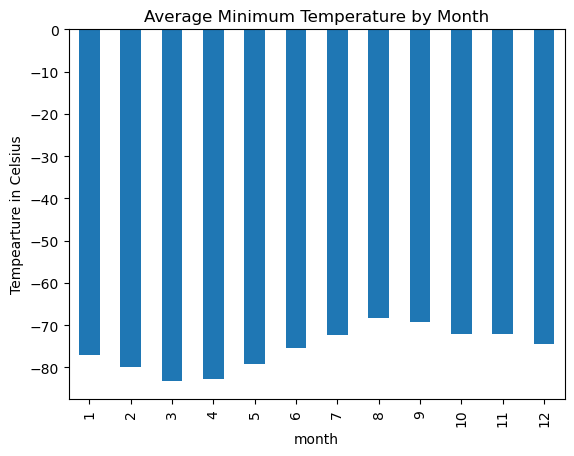

In [150]:
# Plot the average minimum temperature by month
avg_temp_month.plot(kind='bar')
plt.title('Average Minimum Temperature by Month')
plt.ylabel('Tempearture in Celsius');

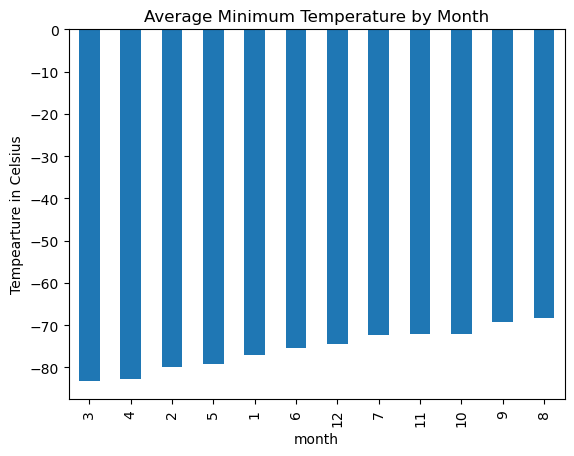

In [151]:
# Identify the coldest and hottest months in Curiosity's location by sorting the previous graph
sorted_avg_temp_month = mars_weather_df.groupby('month')['min_temp'].mean().sort_values(ascending=True)
sorted_avg_temp_month.plot(kind='bar')
plt.title('Average Minimum Temperature by Month')
plt.ylabel('Tempearture in Celsius');

In [152]:
# 4. What is the average pressure by month?
avg_pressure_month = mars_weather_df.groupby('month')['pressure'].mean()
avg_pressure_month

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64

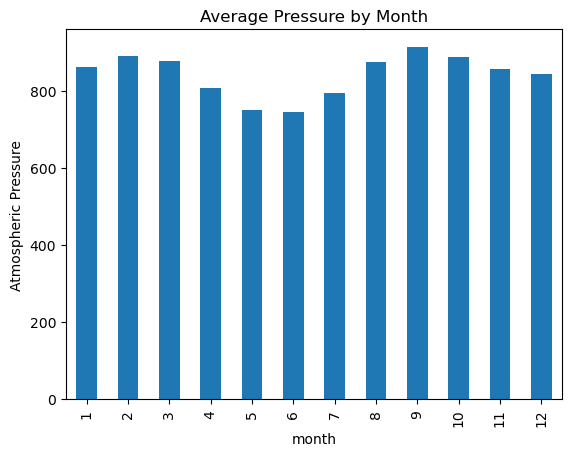

In [153]:
# Plot the average pressure by month
avg_pressure_month.plot(kind='bar')
plt.title('Average Pressure by Month')
plt.ylabel('Atmospheric Pressure');

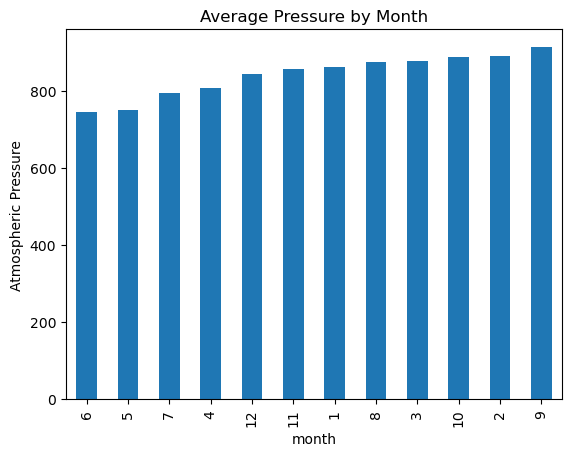

In [154]:
# Identify the lowest and highest pressure months in Curiosity's location by sorting the previous graph
sorted_avg_pressure_month = mars_weather_df.groupby('month')['pressure'].mean().sort_values(ascending=True)
sorted_avg_pressure_month.plot(kind='bar')
plt.title('Average Pressure by Month')
plt.ylabel('Atmospheric Pressure');

In [155]:
#earthday_per_marsyear = mars_weather_df[['sol','min_temp']]
#earthday_per_marsyear.set_index('sol', inplace=True)
#earthday_per_marsyear

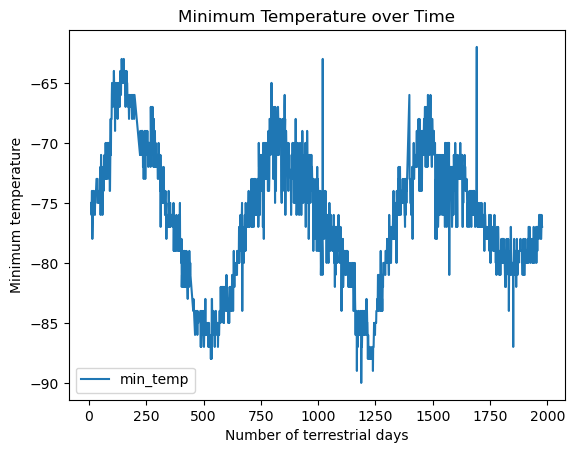

In [156]:
# 5. How many terrestrial (Earth) days are there in a Martian year?
# Visually estimate the result by plotting the daily minimum temperature of each observation in the data set.
earthday_per_marsyear = mars_weather_df[['sol','min_temp']]
earthday_per_marsyear.set_index('sol', inplace=True)

earthday_per_marsyear.plot(kind='line')
plt.title('Minimum Temperature over Time')
plt.xlabel('Number of terrestrial days')
plt.ylabel('Minimum temperature');

#### Minimum Temperature

Looking at our plots for minimum temperature by month, we can see that the 3rd month has the lowest minimum while the 8th month has the highest mimimum on average. While all 12 months in Mars appears relatively cold or quite literally freezing, we can still speculate the inverse of later months (7-12) being the warmer months and months 1-6 being the coldest times. 

#### Atmospheric Pressure

The plots generated based off the data shows that month 6 has the lowest pressure while month 9 has the higest pressure on average. We can also see that the pressure is usually within 200 atmospheric pressure between the months. We can infer that there is no correlation between pressure and temperature during the months bases on both plots, but that is unconfirmed without further testing of data.

#### Year Length

We already know that one martian year is 12 months, but not how manys in the year or each month. Since we have data on the the amount of observations made, we can plot that with the minimum temperature to see the temperature over a long period of time to visually estimate the amount of Earth days is in a martian year. It appears that the rough estimate is about 625 days. It was estimated by looking at the min temperature on day 0 and looking at how many days it takes to get to that same temp after reaching a high min temp and low min temp once.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [157]:
# Write the data to a CSV
mars_weather_df.to_csv('Collected Data/mars_weather.csv', index=False, header=True)


In [158]:
browser.quit()